I modeled my code after renukadevird for kaggle.com, https://www.kaggle.com/renukadevird/crypto-corr

In [355]:
His intial program execution:
# Load Data
# Understanding Data
# Data cleaning and preparation
# Drop columns
# Missing data
# Data aggregation
# Understanding the trends
# Analysing the combined trends

# Average closing value
# Marketcap
# Closing volume
# Comparining the trends between 2020 - 2021

# Correlation



# normalize between 0 and 1:
# X - min(X)/max(X) - min(X)

SyntaxError: invalid syntax (Temp/ipykernel_18784/3600390106.py, line 1)

In [810]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
simplefilter(action='ignore', category=DataConversionWarning)

In [811]:
# use these as the keys to map, add name of coin here so don't need to do it everywhere else
crypto_names = ['Bitcoin', 'Shibainu', 'Saitama', 'XRP', 'Ethereum', 'Litecoin']

#load coin data
c_bitcoin = pd.read_csv('bitcoin-coinmarketcap-1year.csv')
c_shibainu = pd.read_csv('shibainu-coinmarketcap-1year.csv')
c_saitama = pd.read_csv('saitama-coinmarketcap-since-inception.csv')
c_xrp = pd.read_csv('xrp-coinmarketcap-1year.csv') #this is the Ripple coin
c_ethereum = pd.read_csv('ethereum-coinmarketcap-1year.csv')
c_litecoin = pd.read_csv('litecoin-coinmarketcap-1year.csv')

coin_dict = {crypto_names[0]:c_bitcoin, crypto_names[1]:c_shibainu, crypto_names[2]:c_saitama \
            ,crypto_names[3]:c_xrp,crypto_names[4]:c_ethereum,crypto_names[5]:c_litecoin}


In [812]:
def print_data_dimensions(coin_name, df):
    display(df.head())
    print("\033[1m" + coin_name + "\033[0m")

In [813]:
for coin_name in coin_dict:
    print_data_dimensions(coin_name, coin_dict[coin_name])

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,40552.13,40929.15,39637.62,40030.98,23310007704,759074084514
1,17-Feb-22,43937.07,44132.97,40249.37,40538.01,26246662813,768654436207
2,16-Feb-22,44578.28,44578.28,43456.69,43961.86,19792547657,833531932920
3,15-Feb-22,42586.46,44667.22,42491.03,44575.20,22721659051,845117683687
4,14-Feb-22,42157.40,42775.78,41681.96,42586.92,20827783012,807375855006


Bitcoin


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,0.000028,0.000030,0.000028,0.000028,1458694142,15455107417
1,17-Feb-22,0.000031,0.000032,0.000028,0.000028,2067544526,15453784566
2,16-Feb-22,0.000031,0.000031,0.000030,0.000031,1350071541,16980455091
3,15-Feb-22,0.000030,0.000032,0.000030,0.000031,1602354887,17154816279
4,14-Feb-22,0.000030,0.000031,0.000029,0.000030,1558119657,16242599694


Shibainu


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,1.880000e-08,2.019000e-08,1.683000e-08,1.748000e-08,14450435,0
1,17-Feb-22,1.853000e-08,1.887000e-08,1.646000e-08,1.882000e-08,10809249,0
2,16-Feb-22,1.969000e-08,1.969000e-08,1.799000e-08,1.853000e-08,8889964,0
3,15-Feb-22,1.908000e-08,2.021000e-08,1.857000e-08,1.969000e-08,12862550,0
4,14-Feb-22,1.801000e-08,2.124000e-08,1.683000e-08,1.911000e-08,12263913,0


Saitama


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,0.7673,0.8039,0.7603,0.7859,2913093056,37682867753
1,17-Feb-22,0.8387,0.8441,0.7582,0.7672,2798023719,36785413824
2,16-Feb-22,0.8524,0.8524,0.8131,0.8390,2165008058,40180105122
3,15-Feb-22,0.8022,0.8559,0.7983,0.8523,2249706300,40816850707
4,14-Feb-22,0.8099,0.8105,0.7826,0.8022,2401300497,38372052719


XRP


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,2884.34,2937.31,2761.64,2785.73,15748173433,333274482393
1,17-Feb-22,3126.86,3154.62,2861.85,2881.48,15860206214,344691405366
2,16-Feb-22,3180.45,3181.62,3055.17,3127.83,12352406833,374117832127
3,15-Feb-22,2933.73,3185.52,2917.86,3179.88,13921257873,380300250254
4,14-Feb-22,2880.19,2957.96,2840.26,2933.48,12164552172,350792159064


Ethereum


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,18-Feb-22,116.33,121.54,114.92,115.20,1205742846,8025593311
1,17-Feb-22,128.10,128.73,115.71,116.30,938120691,8101712520
2,16-Feb-22,131.76,131.77,126.02,128.16,715637001,8926909807
3,15-Feb-22,124.79,132.11,124.24,131.76,783234535,9176898885
4,14-Feb-22,126.13,126.64,122.24,124.80,712457600,8691113990


Litecoin


In [814]:
#check coin data for null values
def check_coin_data_for_null(coin_name, df):
    print("\033[1m" + coin_name + "\033[0m NaN", np.any(df.isna()))
    display(df.info())

In [815]:
for coin_name in coin_dict:
    check_coin_data_for_null(coin_name, coin_dict[coin_name])

Bitcoin NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Open*       365 non-null    float64
 2   High        365 non-null    float64
 3   Low         365 non-null    float64
 4   Close**     365 non-null    float64
 5   Volume      365 non-null    int64  
 6   Market Cap  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


None

Shibainu NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Open*       365 non-null    float64
 2   High        365 non-null    float64
 3   Low         365 non-null    float64
 4   Close**     365 non-null    float64
 5   Volume      365 non-null    int64  
 6   Market Cap  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


None

Saitama NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        246 non-null    object 
 1   Open*       246 non-null    float64
 2   High        246 non-null    float64
 3   Low         246 non-null    float64
 4   Close**     246 non-null    float64
 5   Volume      246 non-null    int64  
 6   Market Cap  246 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 13.6+ KB


None

XRP NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Open*       365 non-null    float64
 2   High        365 non-null    float64
 3   Low         365 non-null    float64
 4   Close**     365 non-null    float64
 5   Volume      365 non-null    int64  
 6   Market Cap  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


None

Ethereum NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Open*       365 non-null    float64
 2   High        365 non-null    float64
 3   Low         365 non-null    float64
 4   Close**     365 non-null    float64
 5   Volume      365 non-null    int64  
 6   Market Cap  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


None

Litecoin NaN False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        365 non-null    object 
 1   Open*       365 non-null    float64
 2   High        365 non-null    float64
 3   Low         365 non-null    float64
 4   Close**     365 non-null    float64
 5   Volume      365 non-null    int64  
 6   Market Cap  365 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.1+ KB


None

In [816]:
#split the data into features and target per coin
Xs_raw_data = dict.fromkeys(crypto_names, [])
Ts_raw_data = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    coin_raw_data = coin_dict[coin_name]
    first_cols = coin_raw_data.iloc[:, 0:4].copy()
    last_cols = coin_raw_data.iloc[:, 5:].copy()
    first_cols.reset_index(drop=True, inplace=True)
    last_cols.reset_index(drop=True, inplace=True)
    
    features = [first_cols, last_cols]
    Xs_raw_data[coin_name] = pd.concat(features, axis=1) #training data of this coin
    
    close_col = coin_raw_data.iloc[:, 4].copy()
    date_col = coin_raw_data.iloc[:, 0].copy()
    
    target_close = [date_col, close_col]
    Ts_raw_data[coin_name] = pd.concat(target_close, axis=1) #target data of this coin
    
#display(Xs_raw_data)
#display(Ts_raw_data)

In [817]:
#original Date format code is from renukadevird @ https://www.kaggle.com/renukadevird/crypto-corr
#modified to fit my data structure
#reformat Date column
for coin_name in crypto_names:
    date_data = Xs_raw_data[coin_name]['Date']
    Xs_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
    date_data = Ts_raw_data[coin_name]['Date']
    Ts_raw_data[coin_name]['Date'] = pd.to_datetime(date_data, format='%d-%b-%y').dt.date #remove time
    
#display(Xs_raw_data)
#display(Ts_raw_data)

In [818]:
#drop unnecessary features
for coin_name in crypto_names:
    print(coin_name)
    Xs_raw_data[coin_name].drop(['Market Cap'], axis = 1, inplace = True) #drop features not mentioned in articles
    #Xs_raw_data[coin_name].drop(['Open*','High','Low'], axis = 1, inplace = True)
    
display(Xs_raw_data['Bitcoin'])

Bitcoin
Shibainu
Saitama
XRP
Ethereum
Litecoin


,Date,Open*,High,Low,Volume
0,2022-02-18,40552.13,40929.15,39637.62,23310007704
1,2022-02-17,43937.07,44132.97,40249.37,26246662813
2,2022-02-16,44578.28,44578.28,43456.69,19792547657
3,2022-02-15,42586.46,44667.22,42491.03,22721659051
4,2022-02-14,42157.40,42775.78,41681.96,20827783012
...,...,...,...,...,...
360,2021-02-23,54204.93,54204.93,45290.59,106102492824
361,2021-02-22,57532.74,57533.39,48967.57,92052420332
362,2021-02-21,56068.57,58330.57,55672.61,51897585191
363,2021-02-20,55887.34,57505.23,54626.56,68145460026


In [819]:
#original Date format code is from renukadevird @ https://www.kaggle.com/renukadevird/crypto-corr
#modified to fit my data structure
# use Date as the row index instead of the default row numbers
for coin_name in crypto_names:
    coin_data_indexed_by_date = {}
    coin_raw = Xs_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Open*','High','Low','Volume']
                        ,index=['Date']))
    Xs_raw_data[coin_name]=coin_data_indexed_by_date
    #print('coin_data_indexed_by_date', coin_data_indexed_by_date)
    
    coin_raw = Ts_raw_data[coin_name]
    coin_data_indexed_by_date = (pd.pivot_table(coin_raw,values=['Close**']
                        ,index=['Date']))
    Ts_raw_data[coin_name]=coin_data_indexed_by_date
    

In [820]:
import pandas as pd
from sklearn import preprocessing

def normalize_data():
    #Normalize the raw data for each coin
    for coin_name in crypto_names:
        Xs_raw_data_for_coin = Xs_raw_data[coin_name] #returns a numpy array
        #print(Xs_raw_data_for_coin)

        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(Xs_raw_data_for_coin)
        Xs_raw_data_for_coin = pd.DataFrame(x_scaled,index=Xs_raw_data_for_coin.index.values
                                            ,columns=Xs_raw_data_for_coin.columns.values)
        #print(Xs_raw_data_for_coin)
        Xs_raw_data[coin_name] = Xs_raw_data_for_coin

        Ts_raw_data_for_coin = Ts_raw_data[coin_name] #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        t_scaled = min_max_scaler.fit_transform(Ts_raw_data_for_coin)
        Ts_raw_data_for_coin = pd.DataFrame(t_scaled,index=Ts_raw_data_for_coin.index.values
                                            ,columns=Ts_raw_data_for_coin.columns.values)
        Ts_raw_data[coin_name] = Ts_raw_data_for_coin

# print(Xs_raw_data)
# print(Ts_raw_data)

In [821]:
#split the features/target into training and testing data
Xs_train = dict.fromkeys(crypto_names, [])
Xs_test = dict.fromkeys(crypto_names, [])
Ts_train = dict.fromkeys(crypto_names, [])
Ts_test = dict.fromkeys(crypto_names, [])

for coin_name in coin_dict:
    print(coin_name)
    X_train, X_test, t_train, t_test = train_test_split(Xs_raw_data[coin_name] \
                                                        , Ts_raw_data[coin_name] \
                                                        ,test_size=0.2, random_state=1)
    Xs_train[coin_name] = X_train
    Xs_test[coin_name] = X_test
    Ts_train[coin_name] = t_train
    Ts_test[coin_name] = t_test

Bitcoin
Shibainu
Saitama
XRP
Ethereum
Litecoin


In [822]:
#display(Ts_train)

In [823]:
Xs_raw_data['Bitcoin']

,High,Low,Open*,Volume
Date,,,,
2021-02-19,56113.65,50937.28,51675.98,63495496918
2021-02-20,57505.23,54626.56,55887.34,68145460026
2021-02-21,58330.57,55672.61,56068.57,51897585191
2021-02-22,57533.39,48967.57,57532.74,92052420332
2021-02-23,54204.93,45290.59,54204.93,106102492824
...,...,...,...,...
2022-02-14,42775.78,41681.96,42157.40,20827783012
2022-02-15,44667.22,42491.03,42586.46,22721659051
2022-02-16,44578.28,43456.69,44578.28,19792547657


In [824]:
print('Bitcoin')
Xs_train['Bitcoin']

Bitcoin


,High,Low,Open*,Volume
Date,,,,
2021-05-08,59464.61,56975.21,57352.77,65382980634
2021-10-04,49456.78,47045.00,48208.91,33383173002
2021-10-23,61743.88,59826.52,60694.63,26882546034
2021-05-11,56872.54,54608.65,55847.24,61308396325
2022-01-24,37247.52,33184.06,36275.73,41856658597
...,...,...,...,...
2021-09-10,47031.74,44344.49,46396.66,39154666597
2021-11-01,62419.00,59695.18,61320.45,36150572843
2021-05-02,57902.59,56141.91,57825.86,38177405335


In [825]:
# df = Ts_raw_data['Bitcoin'].copy()
# df = df.to_numpy()
# df

In [826]:
# features = Xs_raw_data['Bitcoin'].copy().to_numpy()
# target = Ts_raw_data['Bitcoin'].copy().to_numpy()
# np.concatenate((features, target), axis=1)

In [827]:
train = Xs_train['Bitcoin']
train

,High,Low,Open*,Volume
Date,,,,
2021-05-08,59464.61,56975.21,57352.77,65382980634
2021-10-04,49456.78,47045.00,48208.91,33383173002
2021-10-23,61743.88,59826.52,60694.63,26882546034
2021-05-11,56872.54,54608.65,55847.24,61308396325
2022-01-24,37247.52,33184.06,36275.73,41856658597
...,...,...,...,...
2021-09-10,47031.74,44344.49,46396.66,39154666597
2021-11-01,62419.00,59695.18,61320.45,36150572843
2021-05-02,57902.59,56141.91,57825.86,38177405335


Original code for the following functions are from Jason Brownlee, PhD at https://machinelearningmastery.com/random-forest-for-time-series-forecasting/ 
Some code adapted to fit this project/dataset.

* series_to_supervised(data, n_in=1, n_out=1, dropnan=True)
* walk_forward_validation(data, n_test)
* train_test_split(data, n_test)
* random_forest_forecast(train, testX)

In [828]:
from numpy import asarray
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# transform a time series dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg.values

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX, model):
	# transform list into array
	train = asarray(train)
	# split into input and output columns
	trainX, trainy = train[:, :-1], train[:, -1]
	# fit model
	#model = RandomForestRegressor(n_estimators=100)
# 	model = Pipeline([('scaler', StandardScaler()),
#                            ('regr', RandomForestRegressor(n_estimators=100))])
	model.fit(trainX, trainy)
	# make a one-step prediction
	yhat = model.predict([testX])
	return yhat[0]

# walk-forward validation for univariate data
#n_test is number of rows out of data rows to use for testing
#print_values is a boolean to print/not to print expected vs predicted values (my addition)
def walk_forward_validation(data, n_test, model, print_values=True):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# split test row into input and output columns
		testX, testy = test[i, :-1], test[i, -1]

		# fit model on history and make a prediction
		yhat = random_forest_forecast(history, testX, model)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
		# summarize progress
		if print_values:
			print('>expected=%.12f, predicted=%.12f' % (testy, yhat))
		else: # (my addition)
			print('.', end='')

	if print_values == False: # (my addition)
			print() #print newline
        
	# estimate prediction error
	error = mean_absolute_error(test[:, -1], predictions)
	r2 = r2_score(test[:, -1], predictions) #my addition to get r2 score
	return r2, error, test[:, -1], predictions

........................................................................................................................
MAE: 814.340, R2: 0.986


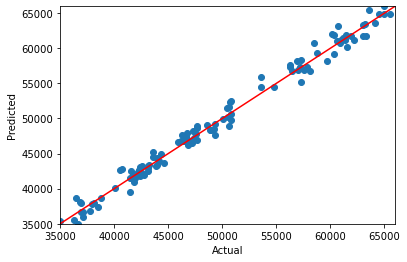

In [829]:
import numpy as np

#test on Bitcoin only
features = Xs_raw_data['Bitcoin'].copy().to_numpy()
target = Ts_raw_data['Bitcoin'].copy().to_numpy()

# features = Xs_raw_data[coin_name].copy().to_numpy()
# target = Ts_raw_data[coin_name].copy().to_numpy()

values = np.concatenate((features, target), axis=1)
data = series_to_supervised(values, n_in=4) #he had 6, I have 4

# evaluate
model = RandomForestRegressor(n_estimators=100)
r2, mae, y, yhat = walk_forward_validation(data, 120, model, False)
print('MAE: %.3f, R2: %.3f' % (mae, r2))

# plot expected vs predicted
# pyplot.plot(y, 'o', label='Expected')
# pyplot.plot(yhat, 'o', label='Predicted')
# pyplot.legend()

pyplot.scatter(y, yhat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
plt.xlim([np.amin(yhat), np.amax(yhat)])
plt.ylim([np.amin(yhat), np.amax(yhat)])
pyplot.show()
#print(np.amin(yhat), np.amax(yhat), np.array(yhat).shape, np.where(yhat == np.amin(yhat)))

............................................................
MAE: 0.000, R2: 0.950


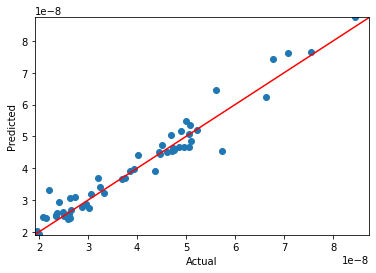

In [830]:
import numpy as np

#test on Saitama only
features = Xs_raw_data['Saitama'].copy().to_numpy()
target = Ts_raw_data['Saitama'].copy().to_numpy()

# features = Xs_raw_data[coin_name].copy().to_numpy()
# target = Ts_raw_data[coin_name].copy().to_numpy()

values = np.concatenate((features, target), axis=1)
data = series_to_supervised(values, n_in=4) #he had 6, I have 4

# evaluate
#model = Ridge(alpha=0.001)
#LinearRegression()
model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
r2, mae, y, yhat = walk_forward_validation(data, 60, model, False)
print('MAE: %.3f, R2: %.3f' % (mae, r2))

# plot expected vs predicted
# pyplot.plot(y, 'o', label='Expected')
# pyplot.plot(yhat, 'o', label='Predicted')
# pyplot.legend()

pyplot.scatter(y, yhat)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
plt.xlim([np.amin(yhat), np.amax(yhat)])
plt.ylim([np.amin(yhat), np.amax(yhat)])
pyplot.show()
#print(np.amin(yhat), np.amax(yhat), np.array(yhat).shape, np.where(yhat == np.amin(yhat)))

............................................................
Bitcoin
MAE: 728.490 ,  R2: 0.949


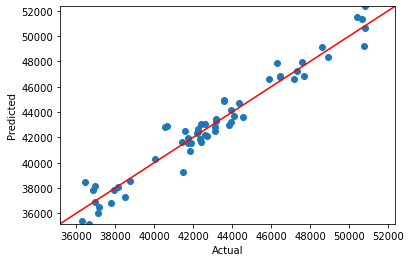

............................................................
Shibainu
MAE: 0.000 ,  R2: 0.934


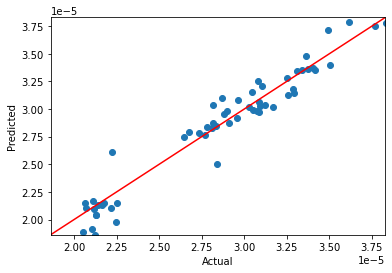

............................................................
Saitama
MAE: 0.000 ,  R2: 0.946


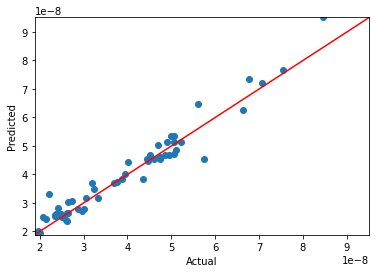

............................................................
XRP
MAE: 0.016 ,  R2: 0.960


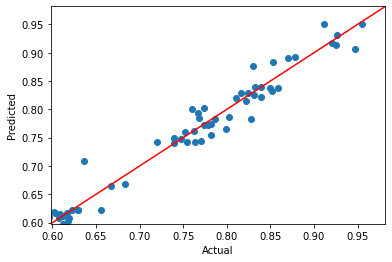

............................................................
Ethereum
MAE: 61.211 ,  R2: 0.975


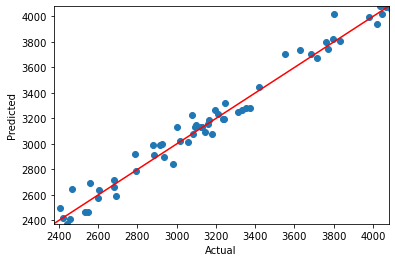

............................................................
Litecoin
MAE: 2.886 ,  R2: 0.950


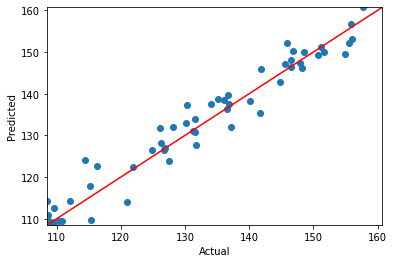

In [831]:
# train and test on all coins
for coin_name in crypto_names:

    features = Xs_raw_data[coin_name].copy().to_numpy()
    target = Ts_raw_data[coin_name].copy().to_numpy()

    values = np.concatenate((features, target), axis=1)
    data = series_to_supervised(values, n_in=4) #he had 6, I have 4

    # evaluate
    model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
    r2, mae, y, yhat = walk_forward_validation(data, 60, model, False)
    print("\033[1m" + coin_name + "\033[0m")
    print('MAE: %.3f' % mae, ', ', 'R2: %.3f' % r2)
    
    pyplot.scatter(y, yhat)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.plot([np.amin(yhat),np.amax(yhat)], [np.amin(yhat),np.amax(yhat)], 'r-')
    plt.xlim([np.amin(yhat), np.amax(yhat)])
    plt.ylim([np.amin(yhat), np.amax(yhat)])
    pyplot.show()

In [832]:
# orginal code flow from Jason Brownlee, PhD
# code adapted to fight dataset
# predict the next day's (day 1) Bitcoin price
def predict_next_day_price(coin_name, prediction_feature_vals):
    features = Xs_raw_data[coin_name].copy().to_numpy()
    target = Ts_raw_data[coin_name].copy().to_numpy()

    values = np.concatenate((features, target), axis=1)

    train = series_to_supervised(values, n_in=4)
    print(train.shape)
    # split into input and output columns
    trainX, trainy = train[:, :-1], train[:, -1]
    # print(trainX.shape, trainy.shape)

    # print(trainX)
    # fit model
    model = Pipeline([('scaler', StandardScaler()), 
                 ('classifier', RandomForestRegressor(n_estimators=100))])
    #model.fit(trainX, trainy)
    model.fit(features, target)

    # construct an input for a new prediction
    row = prediction_feature_vals
    #print(row)

    # make a one-step prediction
    yhat = model.predict(asarray([row]))
    print('Input: %s, Predicted: %.3f' % (row, yhat[0]))
    
    return yhat[0]

In [833]:
import datetime

#add the predicted value to dataset
def add_predicted_val_to_coin(coin_name, prediction_features, predicted_val):
    latest_date_index = Xs_raw_data[coin_name].index[len(Xs_raw_data[coin_name])-1]
    next_date_index = latest_date_index + datetime.timedelta(days=1)

    Xs_raw_data[coin_name].loc[next_date_index] = np.array(np.array(prediction_features))
    Ts_raw_data[coin_name].loc[next_date_index] = predicted_val
    df = Xs_raw_data[coin_name].copy()
    df = df.assign(Close = Ts_raw_data[coin_name])
    display(df)
    #print(pd.concat([Xs_raw_data[coin_name],Ts_raw_data[coin_name]]))

In [834]:
# function to predict the next n number of future day prices
# the array count of prediction_features determines the number of days
# prediction is a 2D array
def predict_next_days_prices(coin_name, prediction_features):
    for day in range(len(prediction_features)):
        predicted_val = predict_next_day_price(coin_name, prediction_features[day])
        print('future', "\033[1m day", (day + 1), "\033[0m", 'predicted price:', predicted_val)
        add_predicted_val_to_coin(coin_name, prediction_features[day], predicted_val)

In [835]:
prediction_features=[[41501.48,41847.16,41038.10,19652846215],
                    [37149.260,37093.630,41500.880,29412210792]]
predict_next_days_prices('Bitcoin', prediction_features)

(361, 25)
Input: [41501.48, 41847.16, 41038.1, 19652846215], Predicted: 42207.446
future  day 1  predicted price: 42207.446400000015


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10,55888.1300
2021-02-20,57505.23,54626.56,55887.34,6.814546e+10,56099.5200
2021-02-21,58330.57,55672.61,56068.57,5.189759e+10,57539.9400
2021-02-22,57533.39,48967.57,57532.74,9.205242e+10,54207.3200
2021-02-23,54204.93,45290.59,54204.93,1.061025e+11,48824.4300
...,...,...,...,...,...
2022-02-15,44667.22,42491.03,42586.46,2.272166e+10,44575.2000
2022-02-16,44578.28,43456.69,44578.28,1.979255e+10,43961.8600
2022-02-17,44132.97,40249.37,43937.07,2.624666e+10,40538.0100


(362, 25)
Input: [37149.26, 37093.63, 41500.88, 29412210792], Predicted: 37457.221
future  day 2  predicted price: 37457.221300000005


,High,Low,Open*,Volume,Close
Date,,,,,
2021-02-19,56113.65,50937.28,51675.98,6.349550e+10,55888.1300
2021-02-20,57505.23,54626.56,55887.34,6.814546e+10,56099.5200
2021-02-21,58330.57,55672.61,56068.57,5.189759e+10,57539.9400
2021-02-22,57533.39,48967.57,57532.74,9.205242e+10,54207.3200
2021-02-23,54204.93,45290.59,54204.93,1.061025e+11,48824.4300
...,...,...,...,...,...
2022-02-16,44578.28,43456.69,44578.28,1.979255e+10,43961.8600
2022-02-17,44132.97,40249.37,43937.07,2.624666e+10,40538.0100
2022-02-18,40929.15,39637.62,40552.13,2.331001e+10,40030.9800


IGNORE ALL THE CODE BELOW THIS.

In [ ]:
# max Close for each coin
coin_max_closes = {}
for coin_name in coin_data_indexed_by_date:
    print("\033[1m" + coin_name + " Max Close\033[0m"
          ,coin_data_indexed_by_date.get(coin_name)['Close**'].max())
    coin_max_closes[coin_name] = coin_data_indexed_by_date.get(coin_name)['Close**'].max()
    print(coin_max_closes)
#print(coin_max_closes.get('Bitcoin'))

In [ ]:
# keep only Close with highest number (max) for each coin in coin_data_indexed_by_date
for coin_name in coin_max_closes:
    coin_data = coin_data_indexed_by_date.get(coin_name)
    #c_btc[c_btc['Close'] == btc]
    coin_max_close = coin_data['Close**'] == coin_max_closes.get(coin_name)
    #print(coin_name, coin_max_close)
    #print(coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)])
    coin_max_close = coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)]
    #coin_data_indexed_by_date.update({coin_name:coin_max_close})

In [ ]:
# sanity check -- make sure max Close is correct for each coin
for coin_name in coin_data_indexed_by_date:
    coin_data = coin_data_indexed_by_date.get(coin_name)
    display(coin_data[coin_data['Close**'] == coin_max_closes.get(coin_name)])

In [ ]:
for coin_name in coin_data_indexed_by_date:
    max_close = coin_max_closes.get(coin_name)
    print("Highest average value of ", coin_name, max_close,"was recorded on ",
      coin_data_indexed_by_date.get(coin_name).index.values[0])
    print(coin_data_indexed_by_date.get(coin_name).index)
# print("Highest average value of Shibainu ", shiba,"was recorded on ",
#       c_shib[c_shib['Close'] == shib].index.values[0])
# print("Highest average value of Saitama ", saitama,"was recorded on ",
#       c_saitamaSym[c_saitamaSym['Close'] == saitama].index.values[0])

In [ ]:
#data = {"Bitcoin":btc,"Shibainu":shiba,"Saitama":saitama}
data = {}
for coin_name in coin_max_closes:
    data[coin_name] = coin_max_closes.get(coin_name)
    
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (15, 5))

plt.bar(Cryptocurrencies,values,color ='orange', width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest volume")
plt.title("Comparision of highest closing value in a day between March 2013 and 2021-07-06")
plt.show()

What is the highest volume transacted in one day between date1 and date2? CHECK

In [ ]:
coin_max_volume = {}
for coin_name in coin_data_indexed_by_date:
    print("\033[1m" + coin_name + " Max Volume\033[0m"
          ,coin_data_indexed_by_date.get(coin_name)['Volume'].max())
    coin_max_volume[coin_name] = coin_data_indexed_by_date.get(coin_name)['Volume'].max()
    print(coin_max_volume)

In [ ]:
for coin_name in coin_data_indexed_by_date:
    print(coin_name)
    display(coin_data_indexed_by_date.get(coin_name))

In [ ]:
for coin_name in coin_data_indexed_by_date:
    print("Highest average volume of ", coin_name, coin_max_volume.get(coin_name)
          ,"was recorded on ",coin_data_indexed_by_date.get(coin_name).index.values[0])

In [ ]:
for coin_name in coin_max_closes:
    data[coin_name] = coin_max_closes.get(coin_name)
data = {"Bitcoin":btc,"Shibainu":shiba,"Saitama":saitama}
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Cryptocurrencies, values,color ='gold',width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest volume")
plt.title("Comparision of highest volume in a day between March 2013 and 2021-07-06")
plt.show()

What is the highest MarketCap in one day between March 2013 and 2021-07-06?

In [ ]:
btc = c_btc['Marketcap'].max()
shib = c_shib['Marketcap'].max()
saitama = c_saitamaSym['Marketcap'].max()

In [ ]:
# finding the highest Marketcap and when 
print("Highest average market capitalization of BTC ", btc,"was recorded on ",
      c_btc[c_btc['Marketcap'] == btc].index.values[0])
print("Highest average market capitalization of SHIB ", shib,"was recorded on ",
      c_shib[c_shib['Market Cap'] == shib].index.values[0])
print("Highest average market capitalization of SAITAMA ", saitama,"was recorded on ",
      c_saitama[c_saitama['Market Cap'] == saitama].index.values[0])

In [ ]:
data = {"Bitcoin":btc,"Shibainu":shiba}
Cryptocurrencies = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(Cryptocurrencies, values,color ='purple',width = 0.4)
plt.xlabel("Cryptocurrencies")
plt.ylabel("Highest Marketcap")
plt.title("Comparision of highest Marketcap in a day between March 2013 and 2021-07-06")
plt.show()

In [ ]:
# Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Bitcoin")
sns.lineplot(x = c_btc.index , y = 'Close', data = c_btc)
sns.lineplot(x = c_shib.index, y = 'Close', data = c_shib)
plt.show()

In [ ]:
#Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Shibainu")
sns.lineplot(x = c_shib.index, y = 'Close', data = c_shib)
plt.show()

In [ ]:
#Finding the trends for each coin
sns.set_theme(style="darkgrid")
plt.figure(figsize=[15,5])
plt.title("Saitama")
sns.lineplot(x = c_saitamaSym.index, y = 'Close', data = c_saitamaSym)
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
(c_btc['Close']).plot(color='darkorange', label='Bitcoin')

plt.legend()
plt.title('Top10 Cryptocurrency closing value)')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
(c_shib['Close']*550000000).plot(color='darkorange', label='Shibainu')
(c_saitamaSym['Close']*550000000000).plot(color='red', label='Saitama')
(c_btc['Close']).plot(color='green', label='Bitcoin')

plt.legend()
plt.title('Cryptocurrency compare closing value')
plt.show()

In [ ]:
def plot_iris_cluster(X, y, mu, dim=2):
    """
        Plot the Itis data with based on passed labels
        
        Args:
            X (np.ndarray): Data formatted as a NumPy array
            y (np.ndarray): Vector of labels to plot each cluster.
            m (float): The center of each cluster
            dim (int): option to plot multidimensional figures (for sepal and petal)
    """
    k = len(np.unique(y)) # mu.shape[0]

    plt.figure(figsize=(12,6))
    #print(mu)
    for i in range(dim):
#         x_min, x_max = X[:, i].min() - .5, X[:, i].max() + .5
#         y_min, y_max = X[:, i+1].min() - .5, X[:, i+1].max() + .5

        plt.subplot(1,2,i+1)
        # TODO 1: Plot the training points
        (X['Close']).plot(color='darkorange', label='Shibainu')
        
        # plot the center
        if mu is not None:
            # TODO 2
            plt.scatter(mu[:, i], mu[:,i+1], marker='o', c='blue', cmap=plt.cm.Set1,
                        edgecolor='k', s=100)

            
            
        plt.xlabel('Sepal length' if i==0 else 'Petal length')
        plt.ylabel('Sepal width'  if i==0 else 'Petal width')

#         plt.xlim(x_min, x_max)
#         plt.ylim(y_min, y_max)
        plt.xticks(())
        plt.yticks(())

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(c_btc, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(c_btc)

labels = ms.labels_
cluster_centers = ms.cluster_centers_
#c_btc
#plot_iris_cluster(c_btc, labels, None, 1)
#(c_btc['Close']).plot(color='darkorange', label='Shibainu')

combined = [c_btc, c_shib]
combined_array = pd.concat(combined).to_numpy()
ms = MeanShift()
ms.fit(combined_pd)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

for i in range(len(combined_array)):
        plt.plot(combined_array[i][1], combined_array[i][0])
#      plt.scatter(combined_array[i][0], combined_array[i][1], marker='o', c='blue', cmap=plt.cm.Set1,
#                           edgecolor='k', s=100)
        
#combined_pd.to_numpy()
pd.concat(combined)